In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import glob
from pathlib import Path

In [3]:
log_dir_root = Path('../../data/')
log_dirs = [log_dir_root / d for d in os.listdir(log_dir_root) if 'halfcheetah' in d]
exp_names = ['_'.join(d.stem.split('_')[2:-3]) for d in log_dirs]
log_files = [d/f for d in log_dirs for f in [f for f in os.listdir(d) if f.startswith('events.out.tfevents')]]

In [4]:
exp_names

['halfcheetah_baseline_bgs2',
 'halfcheetah_baseline',
 'halfcheetah_baseline_nb',
 'halfcheetah']

In [5]:
exp_scalars = []
for log_file in log_files:
    ea = EventAccumulator(str(log_file))
    ea.Reload()

    scalars = {}
    for tag in ea.Tags()['scalars']:
        scalar_events = ea.Scalars(tag)
        steps = [s.step for s in scalar_events]
        values = [s.value for s in scalar_events]
        scalars[tag] = {'steps': steps, 'values': values}
        
    exp_scalars.append(scalars)

In [6]:
for k in exp_scalars[0].keys():
    print(k)

Eval_AverageReturn
Eval_StdReturn
Eval_MaxReturn
Eval_MinReturn
Eval_AverageEpLen
Train_AverageReturn
Train_StdReturn
Train_MaxReturn
Train_MinReturn
Train_AverageEpLen
Actor_Loss
Baseline_Loss
Train_EnvstepsSoFar
TimeSinceStart
Initial_DataCollection_AverageReturn


In [7]:
scalars = exp_scalars[0]
for k in scalars.keys():
    print(k)

Eval_AverageReturn
Eval_StdReturn
Eval_MaxReturn
Eval_MinReturn
Eval_AverageEpLen
Train_AverageReturn
Train_StdReturn
Train_MaxReturn
Train_MinReturn
Train_AverageEpLen
Actor_Loss
Baseline_Loss
Train_EnvstepsSoFar
TimeSinceStart
Initial_DataCollection_AverageReturn


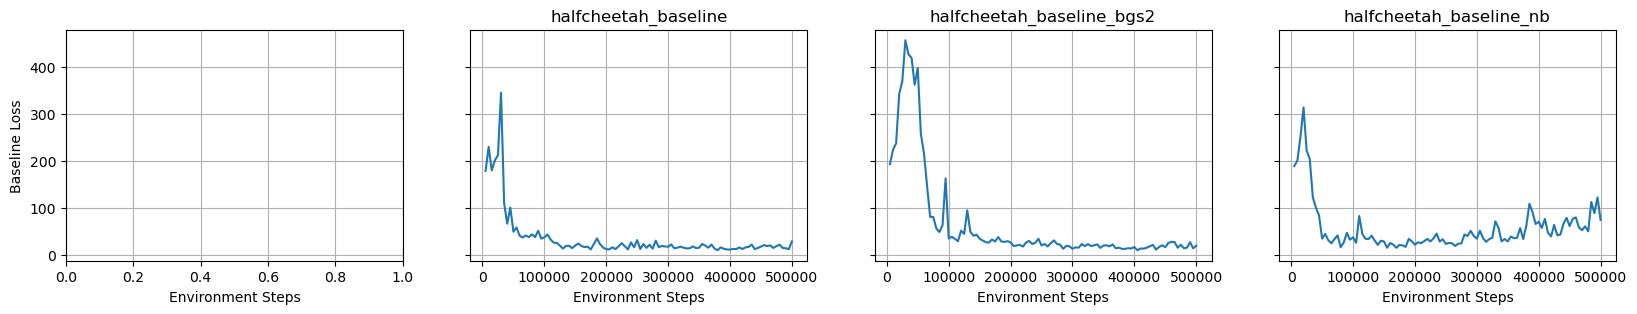

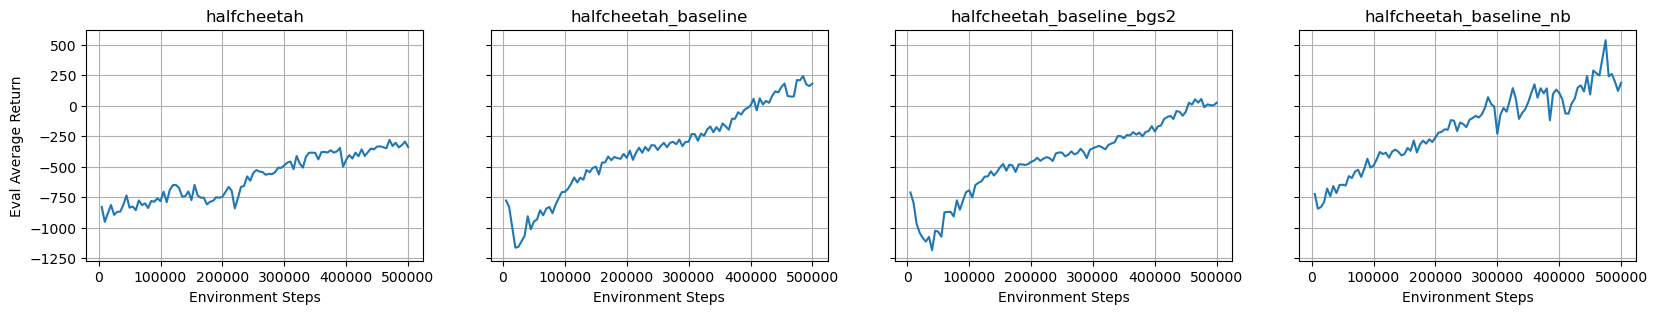

In [8]:
#---------------------------
# baseline loss
#---------------------------
_, axs = plt.subplots(1, 4, figsize=(20,3), sharey=True)
for i, ax in zip([1,0,2], axs[1:]):
    exp_name = exp_names[i]
    scalars = exp_scalars[i]
    baseline_loss = scalars['Baseline_Loss']['values']
    env_steps = scalars['Train_EnvstepsSoFar']['values']
    ax.plot(env_steps, baseline_loss)
    ax.set_title(exp_name)

axs[0].set_ylabel('Baseline Loss')
for ax in axs:
    ax.grid()
    ax.set_xlabel('Environment Steps')
plt.show()

#---------------------------
# eval average return
#---------------------------
_, axs = plt.subplots(1, 4, figsize=(20,3), sharey=True)
for i, ax in zip([3,1,0,2], axs):
    exp_name = exp_names[i]
    scalars = exp_scalars[i]
    eval_avg_returns = scalars['Eval_AverageReturn']['values']
    env_steps = scalars['Train_EnvstepsSoFar']['values']
    ax.plot(env_steps, eval_avg_returns)
    ax.set_title(exp_name)

axs[0].set_ylabel('Eval Average Return')
for ax in axs:
    ax.grid()
    ax.set_xlabel('Environment Steps')
plt.show()